In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Part A

In [5]:
data = pd.read_csv("input/P1/dataset.csv")
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
columns = data.columns
columns_data = columns[2:]
columns_data

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:

for col in columns_data:
    select_col = data[col]
    select_col.replace(to_replace=0, value=select_col.mean(), inplace=True)  # remove zeros

data.dropna(inplace=True)
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.485003,0.2782,0.269407,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.485003,0.2782,0.269407,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.485003,0.2782,0.269407,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.485003,0.2782,0.269407,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.485003,0.2782,0.269407,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.485003,0.2782,0.269407,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.485003,0.2782,0.269407,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.485003,0.2782,0.269407,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.485003,0.2782,0.269407,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [9]:
data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

now none of cell is zero and we have no null cell in table

### Normalization

In [10]:
data[columns_data[:-2]] = ((data[columns_data[:-2]] - data[columns_data[:-2]].mean()) / (
            data[columns_data[:-2]].max() - data[columns_data[:-2]].min()))
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,-0.059566,-0.096549,0.019443,0.067104,-0.073911,-0.032896,-0.014504,0.030655,...,-0.014861,-0.011919,-0.011887,0.316778,-0.001359,0.752216,0.300263,0.390274,29.1,21.2
1,2.0,2013-06-30,0.122252,-0.085796,-0.056669,0.054644,0.011022,0.034094,-0.073897,-0.046495,...,-0.014861,-0.011919,-0.011887,0.316778,0.131327,-0.085794,-0.146791,0.315977,30.5,22.5
2,3.0,2013-06-30,0.105206,0.005602,-0.102051,-0.106839,0.022525,0.068669,-0.050375,-0.184654,...,-0.014861,-0.011919,-0.011887,0.173770,0.215469,-0.143082,-0.195613,0.312516,31.1,23.9
3,4.0,2013-06-30,0.127934,0.010978,0.019241,0.197811,0.004040,-0.012094,-0.076102,0.014248,...,-0.014861,-0.011919,-0.011887,0.530761,0.098964,-0.081025,0.251008,0.308554,31.7,24.3
4,5.0,2013-06-30,0.093843,-0.069667,-0.006997,0.043695,-0.024200,-0.001649,-0.071625,0.200306,...,-0.014861,-0.011919,-0.011887,0.031291,0.464660,-0.134424,-0.148484,0.310109,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,-0.377748,-0.290097,-0.406909,-0.245945,-0.086408,-0.339407,-0.025868,-0.232927,...,-0.014861,-0.011919,-0.011887,0.031291,0.157217,-0.178132,-0.135373,-0.533674,27.6,17.7
7746,22.0,2017-08-30,-0.411839,-0.311603,-0.338246,-0.113745,-0.139369,-0.371269,-0.069882,0.086575,...,-0.014861,-0.011919,-0.011887,-0.183222,0.306084,-0.199792,-0.221776,-0.542223,28.0,17.1
7747,23.0,2017-08-30,-0.366384,-0.327732,-0.380841,-0.231127,-0.156237,-0.308608,-0.049812,0.042136,...,-0.014861,-0.011919,-0.011887,-0.040213,-0.324984,-0.231693,-0.217406,-0.541315,28.3,18.1
7748,24.0,2017-08-30,-0.366384,-0.295474,-0.415144,-0.269479,-0.124774,-0.311355,-0.029053,-0.067181,...,-0.014861,-0.011919,-0.011887,-0.111718,-0.266731,-0.223152,-0.204235,-0.544285,28.6,18.8


In [11]:

# Using pandas.DatetimeIndex() to extract year
data['Date'] = pd.DatetimeIndex(data['Date']).year
data


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013,-0.059566,-0.096549,0.019443,0.067104,-0.073911,-0.032896,-0.014504,0.030655,...,-0.014861,-0.011919,-0.011887,0.316778,-0.001359,0.752216,0.300263,0.390274,29.1,21.2
1,2.0,2013,0.122252,-0.085796,-0.056669,0.054644,0.011022,0.034094,-0.073897,-0.046495,...,-0.014861,-0.011919,-0.011887,0.316778,0.131327,-0.085794,-0.146791,0.315977,30.5,22.5
2,3.0,2013,0.105206,0.005602,-0.102051,-0.106839,0.022525,0.068669,-0.050375,-0.184654,...,-0.014861,-0.011919,-0.011887,0.173770,0.215469,-0.143082,-0.195613,0.312516,31.1,23.9
3,4.0,2013,0.127934,0.010978,0.019241,0.197811,0.004040,-0.012094,-0.076102,0.014248,...,-0.014861,-0.011919,-0.011887,0.530761,0.098964,-0.081025,0.251008,0.308554,31.7,24.3
4,5.0,2013,0.093843,-0.069667,-0.006997,0.043695,-0.024200,-0.001649,-0.071625,0.200306,...,-0.014861,-0.011919,-0.011887,0.031291,0.464660,-0.134424,-0.148484,0.310109,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017,-0.377748,-0.290097,-0.406909,-0.245945,-0.086408,-0.339407,-0.025868,-0.232927,...,-0.014861,-0.011919,-0.011887,0.031291,0.157217,-0.178132,-0.135373,-0.533674,27.6,17.7
7746,22.0,2017,-0.411839,-0.311603,-0.338246,-0.113745,-0.139369,-0.371269,-0.069882,0.086575,...,-0.014861,-0.011919,-0.011887,-0.183222,0.306084,-0.199792,-0.221776,-0.542223,28.0,17.1
7747,23.0,2017,-0.366384,-0.327732,-0.380841,-0.231127,-0.156237,-0.308608,-0.049812,0.042136,...,-0.014861,-0.011919,-0.011887,-0.040213,-0.324984,-0.231693,-0.217406,-0.541315,28.3,18.1
7748,24.0,2017,-0.366384,-0.295474,-0.415144,-0.269479,-0.124774,-0.311355,-0.029053,-0.067181,...,-0.014861,-0.011919,-0.011887,-0.111718,-0.266731,-0.223152,-0.204235,-0.544285,28.6,18.8


## outliers

In [12]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[columns_data])
K = [3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 20]

clusters_inertia = []

In [13]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data[columns_data[:-2]])

    distortions.append(sum(np.min(cdist(data[columns_data[:-2]], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(data[columns_data[:-2]], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_

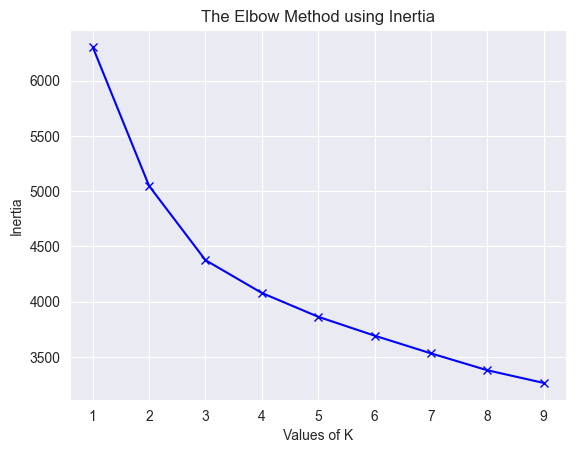

In [14]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# K = 3

In [15]:
# Building and fitting the model
kmeanModel = KMeans(n_clusters=3).fit(data[columns_data[:-2]])
kmeanModel.cluster_centers_

array([[-6.90338099e-02, -6.17053379e-02,  5.78668029e-02,
         9.42288207e-02, -6.83442701e-02, -7.65650011e-02,
         5.95519677e-02,  5.07492914e-02, -2.71963350e-02,
        -2.56309134e-02, -1.55831895e-02, -2.12646740e-02,
        -3.15384576e-03, -4.80661530e-03, -1.29821691e-04,
        -3.49127018e-03,  6.91062505e-02, -2.77437355e-02,
         6.37683283e-01,  5.88374955e-01,  3.01854859e-02],
       [ 4.66694007e-02,  1.27312978e-02, -1.07964021e-01,
        -6.50155917e-02,  7.43226802e-02,  2.31935753e-02,
        -2.74569732e-02,  1.43883218e-02, -1.38491104e-01,
        -1.54940316e-01, -1.44355854e-01, -1.18886159e-01,
        -1.05800822e-02, -1.65707548e-02, -1.00269655e-02,
        -8.58421759e-03, -1.16308293e-02,  7.85880317e-03,
        -8.79403906e-02, -8.11041086e-02, -3.50211833e-02],
       [-5.20925163e-02,  7.94026077e-04,  1.56149843e-01,
         7.32505439e-02, -9.75164514e-02, -1.10996674e-02,
         2.40198476e-02, -4.12702895e-02,  2.35798378e

In [16]:
m, n = data.shape
m, n

(7588, 25)

In [17]:
all_dists = cdist(data[columns_data[:-2]], kmeanModel.cluster_centers_, 'euclidean')
dists = []

for index, row in enumerate(all_dists):
    dists.append(min(row))
dists = sorted(dists)
dists

[0.3357473643668801,
 0.35319291691166765,
 0.35718351652045327,
 0.36600807130844154,
 0.366645329608184,
 0.3687859048852071,
 0.37592013492956683,
 0.3849582295141157,
 0.38576951641977486,
 0.3867133281197512,
 0.3936656459552456,
 0.39477321520441866,
 0.3973360004358754,
 0.40139994348482544,
 0.4015646601066017,
 0.40261188433799916,
 0.4030221710166382,
 0.4045517977517258,
 0.4048410601738189,
 0.40672534129568294,
 0.4092063306030066,
 0.4096762495012303,
 0.41020331232032126,
 0.41032270158616424,
 0.4111438652276494,
 0.4120839491518578,
 0.41211893469014416,
 0.4136864066828708,
 0.414680587502157,
 0.41492955456228153,
 0.41578712463441736,
 0.4158927944742201,
 0.41654273812562037,
 0.4166096251393572,
 0.4181956927711132,
 0.41824430190194883,
 0.41851770461872073,
 0.41879470558923565,
 0.41934998648138844,
 0.41956995242331285,
 0.41977990966205214,
 0.4200348887917293,
 0.42079210047397797,
 0.422141988292128,
 0.42329456341112714,
 0.42357255314837555,
 0.4261581305

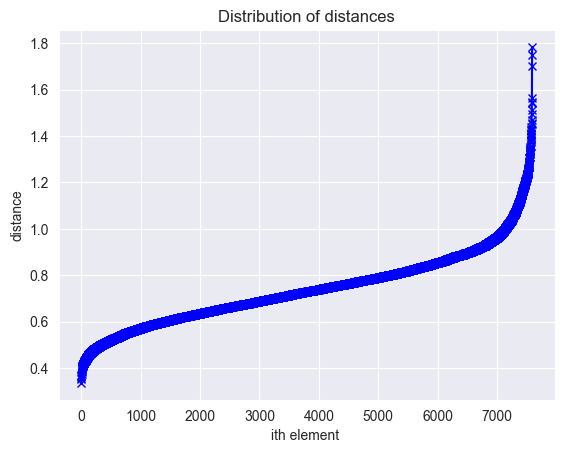

In [18]:
X = np.arange(1, m + 1)
plt.plot(X, dists, 'bx-')
plt.xlabel('ith element ')
plt.ylabel('distance')
plt.title('Distribution of distances')
plt.show()

In [19]:
threshold = 1
must_remove = []
for index, row in enumerate(all_dists):
    dist_to_center = min(row)
    if threshold < dist_to_center:
        must_remove.append(index)




In [20]:
len(must_remove)

459

In [21]:
data.drop(index=data.index[must_remove], axis=0, inplace=True)
data.shape

(7129, 25)

split

In [22]:
test_data = data.loc[data['Date'] > 2015]
train_data = data.loc[data['Date'] <= 2015]

train_data
test_data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4651,2.0,2016,-0.156157,-0.037409,0.238260,0.212156,-0.132208,-0.041487,0.020304,-0.036415,...,-0.012952,-0.017602,0.438811,0.316778,0.131327,-0.085794,-0.146791,0.312757,26.3,21.7
4652,3.0,2016,-0.133430,-0.037409,0.201050,0.147962,-0.109716,-0.024598,0.036463,-0.048437,...,-0.028892,-0.014904,0.461977,0.173770,0.215469,-0.143082,-0.195613,0.309297,28.2,22.0
4654,5.0,2016,-0.127748,-0.042785,0.256108,0.208906,-0.132118,-0.026421,0.034461,-0.008717,...,-0.028358,-0.013968,0.377651,0.031291,0.464660,-0.134424,-0.148484,0.306860,27.9,22.6
4655,6.0,2016,-0.122066,-0.015904,0.193444,0.074306,-0.129830,-0.002969,0.025690,-0.050529,...,-0.032694,-0.013683,0.464453,-0.183222,0.163689,-0.036405,-0.219315,0.315413,28.4,22.7
4656,7.0,2016,-0.184566,-0.021280,0.284730,0.175657,-0.151562,-0.027977,0.020730,-0.002226,...,-0.023973,-0.014379,0.454326,0.173770,-0.496505,-0.247784,-0.228607,0.300671,26.9,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,21.0,2017,-0.167521,-0.247087,-0.389611,0.014973,-0.251096,-0.350302,0.007610,-0.183107,...,-0.014861,-0.011919,-0.011887,0.031291,0.157217,-0.178132,-0.135373,-0.486350,24.0,18.8
7696,22.0,2017,-0.195930,-0.257839,-0.337246,-0.061499,-0.271551,-0.324303,0.028103,0.274758,...,-0.014861,-0.011919,-0.011887,-0.183222,0.306084,-0.199792,-0.221776,-0.494737,24.4,18.5
7698,24.0,2017,-0.139112,-0.230957,-0.343631,0.065927,-0.298380,-0.409959,0.165734,0.033792,...,-0.014861,-0.011919,-0.011887,-0.111718,-0.266731,-0.223152,-0.204235,-0.496783,24.5,18.2
7699,25.0,2017,-0.133430,-0.252463,-0.412561,0.040225,-0.246306,-0.394722,0.093952,-0.197084,...,-0.014861,-0.011919,-0.011887,-0.111718,-0.069320,-0.211706,-0.194589,-0.489159,23.4,18.1


In [23]:
label_Tmin_train = train_data[columns_data[-1]]
label_Tmax_train = train_data[columns_data[-2]]
X_train = train_data[columns_data[:-2]]

label_Tmin_test = test_data[columns_data[-1]]
label_Tmax_test = test_data[columns_data[-2]]
X_test = test_data[columns_data[:-2]]

X_test

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
4651,-0.156157,-0.037409,0.238260,0.212156,-0.132208,-0.041487,0.020304,-0.036415,0.125792,0.568544,...,0.617253,-0.040609,-0.012952,-0.017602,0.438811,0.316778,0.131327,-0.085794,-0.146791,0.312757
4652,-0.133430,-0.037409,0.201050,0.147962,-0.109716,-0.024598,0.036463,-0.048437,0.099089,0.578020,...,0.599834,-0.015638,-0.028892,-0.014904,0.461977,0.173770,0.215469,-0.143082,-0.195613,0.309297
4654,-0.127748,-0.042785,0.256108,0.208906,-0.132118,-0.026421,0.034461,-0.008717,0.053565,0.547708,...,0.570124,-0.015638,-0.028358,-0.013968,0.377651,0.031291,0.464660,-0.134424,-0.148484,0.306860
4655,-0.122066,-0.015904,0.193444,0.074306,-0.129830,-0.002969,0.025690,-0.050529,0.107427,0.535788,...,0.588654,-0.015638,-0.032694,-0.013683,0.464453,-0.183222,0.163689,-0.036405,-0.219315,0.315413
4656,-0.184566,-0.021280,0.284730,0.175657,-0.151562,-0.027977,0.020730,-0.002226,0.198187,0.582986,...,0.582716,-0.040344,-0.023973,-0.014379,0.454326,0.173770,-0.496505,-0.247784,-0.228607,0.300671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,-0.167521,-0.247087,-0.389611,0.014973,-0.251096,-0.350302,0.007610,-0.183107,0.019714,-0.290913,...,-0.208487,-0.015638,-0.014861,-0.011919,-0.011887,0.031291,0.157217,-0.178132,-0.135373,-0.486350
7696,-0.195930,-0.257839,-0.337246,-0.061499,-0.271551,-0.324303,0.028103,0.274758,0.003381,-0.290172,...,-0.213855,-0.015638,-0.014861,-0.011919,-0.011887,-0.183222,0.306084,-0.199792,-0.221776,-0.494737
7698,-0.139112,-0.230957,-0.343631,0.065927,-0.298380,-0.409959,0.165734,0.033792,-0.029545,-0.287393,...,-0.207460,-0.015638,-0.014861,-0.011919,-0.011887,-0.111718,-0.266731,-0.223152,-0.204235,-0.496783
7699,-0.133430,-0.252463,-0.412561,0.040225,-0.246306,-0.394722,0.093952,-0.197084,0.020232,-0.284433,...,-0.209298,-0.015638,-0.014861,-0.011919,-0.011887,-0.111718,-0.069320,-0.211706,-0.194589,-0.489159


### pair plot

In [ ]:
sns.pairplot(data)

result of this part remove because has huge size (20 MB)

# PartB

In [22]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.03,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, label_Tmax_train)

mse = mean_squared_error(label_Tmax_test, reg.predict(X_test))
print(f"The mean squared error (MSE) on test set: {mse}")
print(f"The sum squared error (SSE) on test set: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set: 2.649607272752508
The sum squared error (SSE) on test set: 7265.223141887377


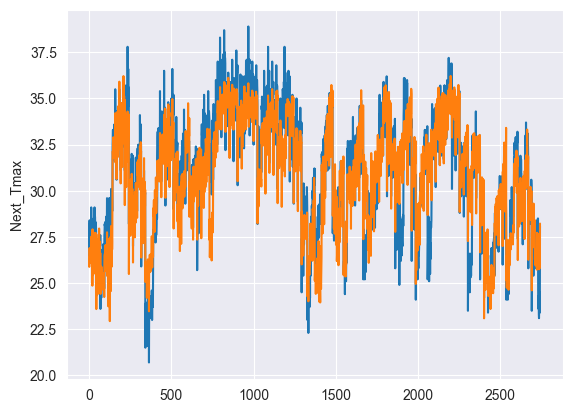

In [23]:
X = np.arange(X_test.shape[0])
plt.ylabel("Next_Tmax")
plt.plot(X, label_Tmax_test, label="real")
plt.plot(X, reg.predict(X_test), label="preds")
plt.show()

###

In [24]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.0001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Initialize weights with random values
        self.weights = np.random.rand(X.shape[1], 1)

        for i in range(self.num_iterations):
            # Make predictions using the current weights
            y_pred = X @ self.weights

            # Compute the error
            y = y.reshape(-1, 1)
            error = y_pred - y

            # Compute the gradient
            gradient = X.T @ error

            # Update the weights
            self.weights -= self.learning_rate * gradient

    def predict(self, X_test):
        # Add bias
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

        # make pred
        y_pred = X_test @ self.weights

        return y_pred



In [25]:
scale_factor = 50
model = LinearRegression()
model.fit(X_train.to_numpy(), label_Tmax_train.to_numpy() / scale_factor)
mse = mean_squared_error(label_Tmax_test, model.predict(X_test) * scale_factor)
print(f"The mean squared error (MSE) on test set: {mse}")
print(f"The sum squared error (SSE) on test set: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set: 2.6037245481619142
The sum squared error (SSE) on test set: 7139.412711059968


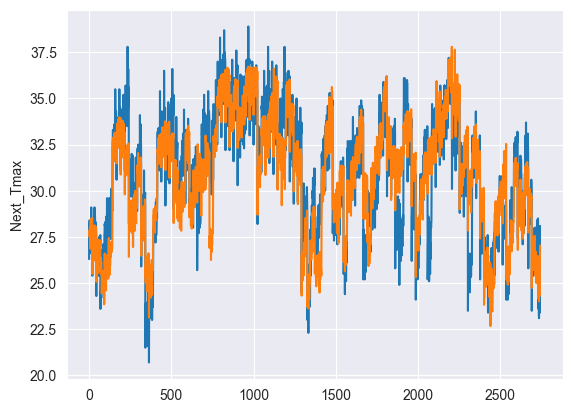

In [26]:
X = np.arange(X_test.shape[0])
plt.ylabel("Next_Tmax")
plt.plot(X, label_Tmax_test, label="real")
plt.plot(X, model.predict(X_test) * scale_factor, label="preds")
plt.show()

# Part C,D,E

In [30]:
class MultiOutputRegression:
    def __init__(self, learning_rate=0.0001, iterations=10000 , scale_factor = 1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.scale_factor = scale_factor

    def fit(self, X, y):
        y = y / self.scale_factor
        X = np.column_stack([np.ones(X.shape[0]), X])
        self.weights = np.random.rand(X.shape[1], y.shape[1]) -0.5
        for i in range(self.iterations):
            predictions = X @ self.weights
            # y = y.reshape(-1, 1)
            error = predictions - y
            gradient = X.T @ error
            self.weights -= self.learning_rate * gradient

    def predict(self, X_test ):
        X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])
        return X_test @ self.weights * self.scale_factor


In [31]:
def concatinate_labels(v1:np.ndarray,v2:np.ndarray):
    res = np.concatenate((v1.reshape(-1,1),v2.reshape(-1,1)) , axis=1)
    return res

In [36]:
# Initialize the multiple output regression model
model = MultiOutputRegression(scale_factor=100)
y_train= concatinate_labels(label_Tmax_train.to_numpy(),label_Tmin_train.to_numpy())
# Fit the model to the input data
model.fit(X_train, y_train)

# Use the trained model to make predictions
y_test= concatinate_labels(label_Tmax_test.to_numpy(),label_Tmin_test.to_numpy())
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"The mean squared error (MSE) on test set: {mse}")
print(f"The sum squared error (SSE) on test set: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set: 1.779866090659933
The sum squared error (SSE) on test set: 4880.392820589536


In [33]:
mse = mean_squared_error(y_test[:,0], model.predict(X_test)[:,0])
print(f"The mean squared error (MSE) on test set for T_max: {mse}")
print(f"The mean squared error (SSE) on test set for T_max: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set for T_max: 2.600173033010389
The mean squared error (SSE) on test set for T_max: 7129.674456514486


In [34]:
mse = mean_squared_error(y_test[:,1], model.predict(X_test)[:,1])
print(f"The mean squared error (MSE) on test set for T_min: {mse}")
print(f"The mean squared error (SSE) on test set for T_min: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set for T_min: 0.9605529622746474
The mean squared error (SSE) on test set for T_min: 2633.836222557083


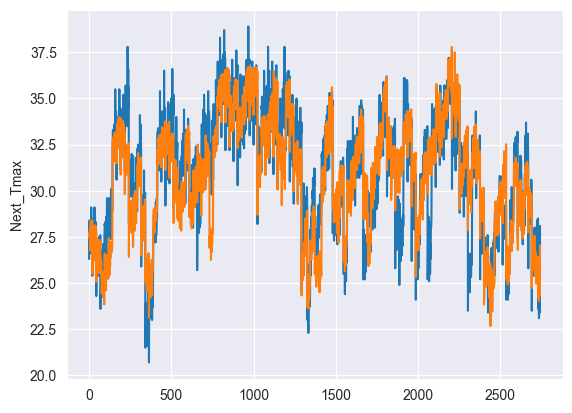

In [35]:
X = np.arange(X_test.shape[0])
plt.ylabel("Next_Tmax")
plt.plot(X, y_test[:,0], label="real")
plt.plot(X, model.predict(X_test)[:,0], label="preds")
plt.show()

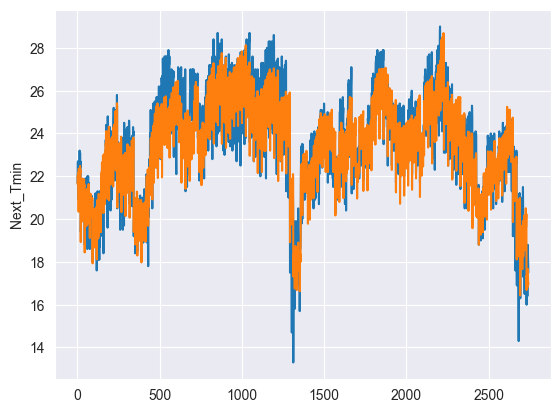

In [74]:
X = np.arange(X_test.shape[0])
plt.ylabel("Next_Tmin")
plt.plot(X, y_test[:,1], label="real")
plt.plot(X, model.predict(X_test)[:,1], label="preds")
plt.show()

# Part F

equation

In [79]:
class MultiOutputRegressionNormalEquation :
    def __init__(self):
        self.weights = []

    def fit(self, X, y):
        X = np.column_stack([np.ones(X.shape[0]), X])
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X_test):
        X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])
        return X_test @ self.weights

In [80]:
# Initialize the multiple output regression model
model = MultiOutputRegressionNormalEquation()
y_train= concatinate_labels(label_Tmax_train.to_numpy(),label_Tmin_train.to_numpy())

# Fit the model to the input data
model.fit(X_train, y_train)

# Use the trained model to make predictions
y_test= concatinate_labels(label_Tmax_test.to_numpy(),label_Tmin_test.to_numpy())
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"The mean squared error (MSE) on test set: {mse}")
print(f"The sum squared error (SSE) on test set: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set: 1.7803738232287858
The sum squared error (SSE) on test set: 4881.785023293331


In [81]:
mse = mean_squared_error(y_test[:,0], model.predict(X_test)[:,0])
print(f"The mean squared error (MSE) on test set for T_max: {mse}")
print(f"The mean squared error (SSE) on test set for T_max: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set for T_max: 2.600997619641839
The mean squared error (SSE) on test set for T_max: 7131.935473057923


In [82]:
mse = mean_squared_error(y_test[:,1], model.predict(X_test)[:,1])
print(f"The mean squared error (MSE) on test set for T_min: {mse}")
print(f"The mean squared error (SSE) on test set for T_min: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set for T_min: 0.9597500268157335
The mean squared error (SSE) on test set for T_min: 2631.6345735287414


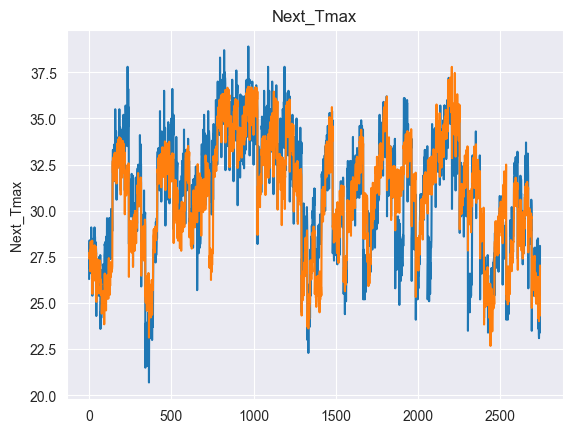

In [83]:
X = np.arange(X_test.shape[0])
plt.title("Next_Tmax")
plt.ylabel("Next_Tmax")
plt.plot(X, y_test[:,0], label="real")
plt.plot(X, model.predict(X_test)[:,0], label="preds")
plt.show()

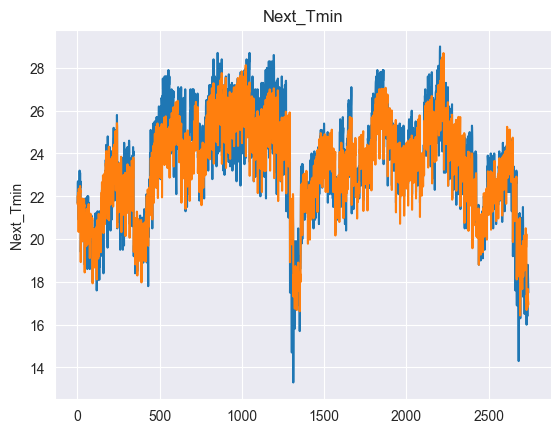

In [84]:
X = np.arange(X_test.shape[0])
plt.title("Next_Tmin")
plt.ylabel("Next_Tmin")
plt.plot(X, y_test[:,1], label="real")
plt.plot(X, model.predict(X_test)[:,1], label="preds")
plt.show()

# g

In [22]:
from tqdm import tqdm

In [23]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Define the KNeighborsRegressor class
class KNeighborsRegressor:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        p_bar = tqdm(total = X_test.shape[0])

        for test_instance in X_test:
            p_bar.update(1)

            distances = []
            for i, train_instance in enumerate(self.X_train):
                distance = euclidean_distance(test_instance, train_instance)
                distances.append((distance, i))
            k_nearest = sorted(distances)[:self.k]
            k_nearest_target_values = [self.y_train[i] for _, i in k_nearest]
            y_pred.append(sum(k_nearest_target_values) / self.k)
        p_bar.close()
        return np.array(y_pred)

In [28]:
# Initialize the multiple output regression model
model = KNeighborsRegressor(k =5)
y_train= concatinate_labels(label_Tmax_train.to_numpy(),label_Tmin_train.to_numpy())
# Fit the model to the input data
model.fit(X_train.to_numpy(), y_train)

# Use the trained model to make predictions
prediction = model.predict(X_test.to_numpy())
y_test= concatinate_labels(label_Tmax_test.to_numpy(),label_Tmin_test.to_numpy())
mse = mean_squared_error(y_test, prediction )
print(f"The mean squared error (MSE) on test set: {mse}")
print(f"The sum squared error (SSE) on test set: {mse * X_test.shape[0]}")

100%|██████████| 2742/2742 [00:43<00:00, 63.21it/s]

The mean squared error (MSE) on test set: 3.2544739606126916
The sum squared error (SSE) on test set: 8923.767600000001


In [29]:
mse = mean_squared_error(y_test[:, 0], prediction[:, 0])
print(f"The mean squared error (MSE) on test set for T_max: {mse}")
print(f"The mean squared error (SSE) on test set for T_max: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set for T_max: 4.037490153172866
The mean squared error (SSE) on test set for T_max: 11070.797999999999


In [30]:
mse = mean_squared_error(y_test[:, 1], prediction[:, 1])
print(f"The mean squared error (MSE) on test set for T_min: {mse}")
print(f"The mean squared error (SSE) on test set for T_min: {mse * X_test.shape[0]}")

The mean squared error (MSE) on test set for T_min: 2.4714577680525167
The mean squared error (SSE) on test set for T_min: 6776.7372000000005


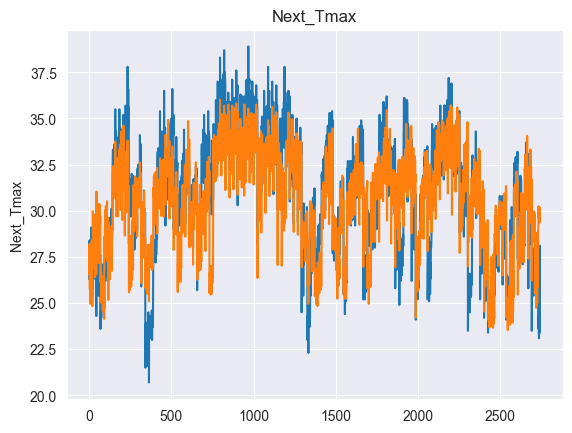

In [31]:
X = np.arange(X_test.shape[0])
plt.title("Next_Tmax")
plt.ylabel("Next_Tmax")
plt.plot(X, y_test[:, 0], label="real")
plt.plot(X,prediction[:, 0], label="preds")
plt.show()

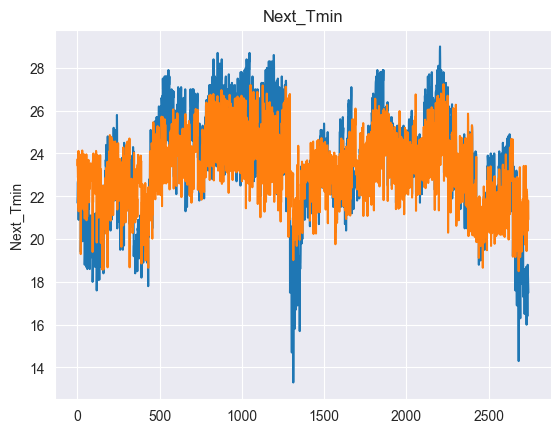

In [32]:
X = np.arange(X_test.shape[0])
plt.title("Next_Tmin")
plt.ylabel("Next_Tmin")
plt.plot(X, y_test[:, 1], label="real")
plt.plot(X, prediction[:, 1], label="preds")
plt.show()